In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support
from datetime import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display

In [4]:
df_crowd = pd.read_csv('./ks-projects-201801.csv')
display(df_crowd.head())
display(df_crowd.describe())
display(df_crowd.info())
print(df_crowd.isnull().sum())
# goal=資金調達の目標、launched=発売日、pledged=出資金、backers=既に出資を決めた人数、usd~=米ドル換算、goal=目標金額、state=状態

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


None

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


In [5]:
# 不必要と思われるデータを除外
df = df_crowd[['name','main_category','currency','deadline','goal','launched','state','backers','usd pledged','usd_pledged_real','usd_goal_real']]
print(df.isnull().sum())
print(df['state'].value_counts()) # underfined:未定義 suspended:一時停止

name                   4
main_category          0
currency               0
deadline               0
goal                   0
launched               0
state                  0
backers                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


In [6]:
# 今回は成功か失敗かを知りたい⇒failedとsuccessfulのみ
df_f = df[df['state'] == 'failed']
df_s = df[df['state'] == 'successful']
df_fs =  df[(df['state'] == 'successful') | (df['state'] =='failed')]
# state=failed,successfulのみ表示
print(df_fs['state'].value_counts()) #除外出来ているか確認のため表示

failed        197719
successful    133956
Name: state, dtype: int64


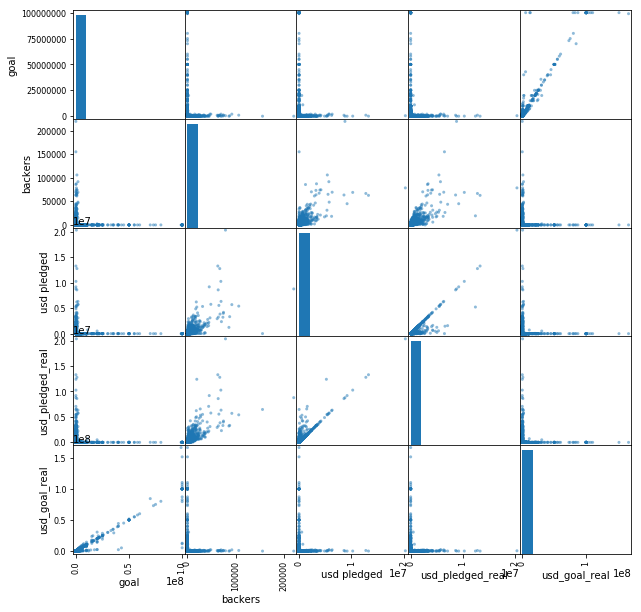

In [7]:
pd.plotting.scatter_matrix(df_fs,figsize=(10,10)) # 関係性の確認
plt.show()

In [8]:
display(df_fs.corr()) # 相関係数の確認

,goal,backers,usd pledged,usd_pledged_real,usd_goal_real
goal,1.000000,0.004794,0.006416,0.005955,0.952614
backers,0.004794,1.000000,0.697493,0.752291,0.005208
usd pledged,0.006416,0.697493,1.000000,0.907713,0.006965
usd_pledged_real,0.005955,0.752291,0.907713,1.000000,0.006354
usd_goal_real,0.952614,0.005208,0.006965,0.006354,1.000000


In [9]:
# 相関係数0.9以上で強い正の相関である
# goalとusd_goal、usd pledgedとusd_pledged_realは強い正の相関と言える。
# また、usd表記は米ドル換算なのでお互いの関連性が高いため、省けると考える。
# pledged_realとbackersは完了後に得られる変数なので除外する
df_fs = df_fs[['name','main_category','currency','deadline','launched','state','usd_goal_real']]
# 除外されているか確認
display(df_fs.head())

,name,main_category,currency,deadline,launched,state,usd_goal_real
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,30000.00
2,Where is Hank?,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,5000.00
5,Monarch Espresso Bar,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,50000.00


In [10]:
df_fs['deadline'] = pd.to_datetime(df_fs['deadline']) # 計算可能にするため、文字列⇒datetime型に変換

In [11]:
df_fs['launched'] = pd.to_datetime(df_fs['launched']) # 同上。なぜか一つにまとめると片側が変換されなかったため、別で実行

In [12]:
df_fs['day_left'] = df_fs['deadline'] - df_fs['launched'] # 残日数計算。計算結果はtimedelta型になる
df_fs.head()

,name,main_category,currency,deadline,launched,state,usd_goal_real,day_left
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,1533.95,58 days 11:47:32
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,30000.00,59 days 19:16:03
2,Where is Hank?,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,45000.00,44 days 23:39:10
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,5000.00,29 days 20:35:49
5,Monarch Espresso Bar,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,50000.00,34 days 10:21:33


In [13]:
df_fs['day_left'] = (df_fs['day_left'] / timedelta(days=1)) # timedelta型を整数に変換
# 計算に使用した2列は不必要なため除外
df_c = df_fs.drop(['deadline','launched'],axis=1)
# 見やすいよう並び替え
df_c = df_c.reindex(columns=['state','name','currency','main_category','day_left','usd_goal_real'])
df_c.head()

,state,name,currency,main_category,day_left,usd_goal_real
0,failed,The Songs of Adelaide & Abullah,GBP,Publishing,58.491343,1533.95
1,failed,Greeting From Earth: ZGAC Arts Capsule For ET,USD,Film & Video,59.802813,30000.00
2,failed,Where is Hank?,USD,Film & Video,44.985532,45000.00
3,failed,ToshiCapital Rekordz Needs Help to Complete Album,USD,Music,29.858206,5000.00
5,successful,Monarch Espresso Bar,USD,Food,34.431632,50000.00


In [14]:
#mein_categoryとcurrencyをランダム変数に置換
df_fs_dummy = pd.get_dummies(df_fs['main_category']) 
df_fs_dummy_c = pd.get_dummies(df_fs['currency'])
display(df_fs_dummy.head())
display(df_fs_dummy_c.head())

,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
df_c['state'] = (df_c['state'] == 'successful') # successfulなら1、failedなら0
df_c['state'].value_counts()

False    197719
True     133956
Name: state, dtype: int64

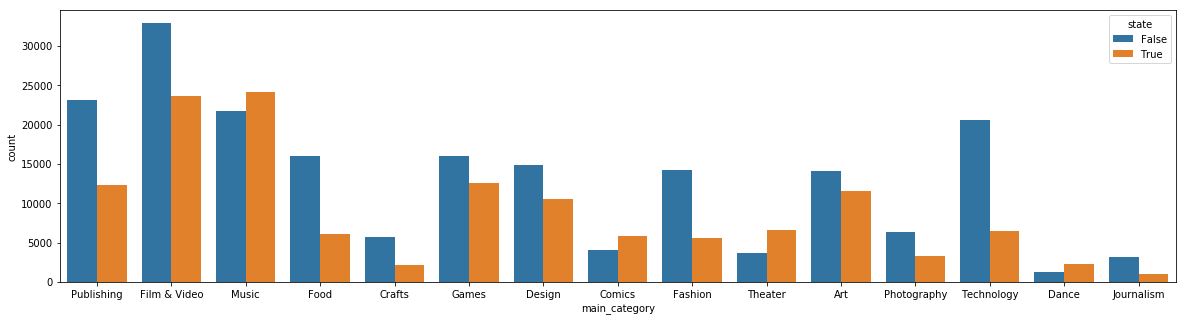

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(data=df_c, x='main_category',hue='state') # main_category毎に成功・失敗があるため説明変数として使用してみる
plt.show()

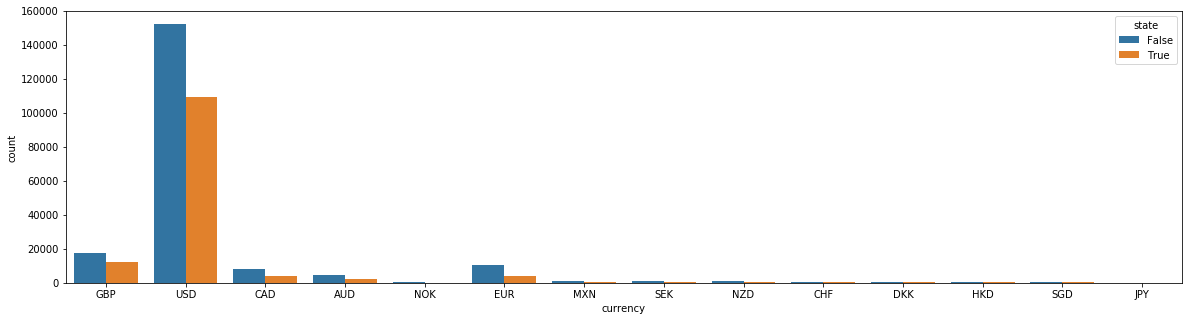

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(data=df_c, x='currency',hue='state') # 通貨毎に成功・失敗があるため説明変数として使用してみる
plt.show()

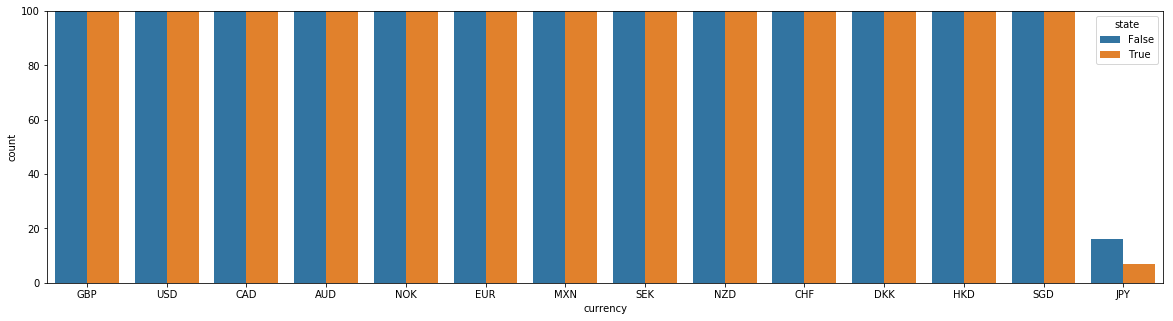

In [18]:
plt.figure(figsize=(20,5)) # JPYの成否が不明なためスケールを変更して見えるようにする
sns.countplot(data=df_c, x='currency',hue='state')
plt.ylim(0,100)
plt.show()

In [19]:
df_c['day_left'].describe() # スケールの大きいday_leftについて考える

count    331675.000000
mean         33.389378
std          12.723385
min           0.005058
25%          29.088929
50%          29.656759
75%          35.705966
max          91.962650
Name: day_left, dtype: float64

In [20]:
print(len(df_c.query('not day_left < 89'))) # maxとminに近い領域で数値がどれだけあるか確認
print(len(df_c.query('not day_left > 13')))

1767
8592


In [21]:
df_c['usd_goal_real'].describe() # スケールの大きいusd_goal_realについて考える

count    3.316750e+05
mean     4.151000e+04
std      1.108930e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [22]:
print(len(df_c.query('not usd_goal_real < 1e+08'))) # maxとminに近い領域で数値がどれだけあるか確認
print(len(df_c.query('not usd_goal_real > 1')))

24
312


In [24]:
df_c['name_str'] = df_c['name'].astype(str) # nameの文字列数を数えるためにtypeをstrに変更

In [25]:
df_c["name_length"] = df_c["name_str"].apply(lambda x: len(x)) # nameをstrに変換したものの文字数を数えたものをlength列に入れ表示
df_c.head()

,state,name,currency,main_category,day_left,usd_goal_real,name_str,name_length
0,False,The Songs of Adelaide & Abullah,GBP,Publishing,58.491343,1533.95,The Songs of Adelaide & Abullah,31
1,False,Greeting From Earth: ZGAC Arts Capsule For ET,USD,Film & Video,59.802813,30000.00,Greeting From Earth: ZGAC Arts Capsule For ET,45
2,False,Where is Hank?,USD,Film & Video,44.985532,45000.00,Where is Hank?,14
3,False,ToshiCapital Rekordz Needs Help to Complete Album,USD,Music,29.858206,5000.00,ToshiCapital Rekordz Needs Help to Complete Album,49
5,True,Monarch Espresso Bar,USD,Food,34.431632,50000.00,Monarch Espresso Bar,20


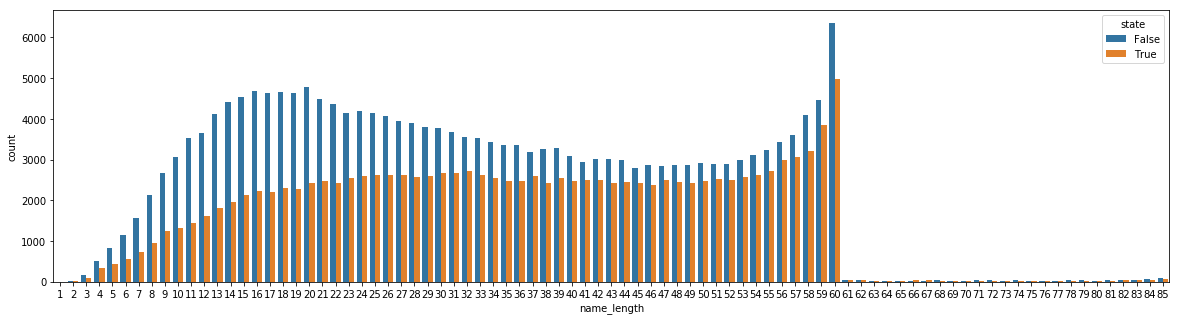

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(data=df_c, x='name_length',hue='state') # main_category毎に成功・失敗があるため説明変数として使用してみる
plt.show()

In [27]:
df_c['name_length'].describe() # スケールの大きいname_lengthについて考える

count    331675.000000
mean         34.220053
std          15.961706
min           1.000000
25%          21.000000
50%          33.000000
75%          48.000000
max          85.000000
Name: name_length, dtype: float64

In [28]:
print(len(df_c.query('not name_length < 80'))) # maxとminに近い領域で数値がどれだけあるか確認
print(len(df_c.query('not name_length > 5')))

602
2423


### ここまでのまとめ
* 説明変数として使えそうなものは、name_length、main_category、currency、usd_goal_real、day_left
* 目的変数はstate (True、Falseに変換済)
* いずれのスケールの大きい説明変数もmaxとminに近い数値がある程度ある、またクラウンドファンディングは最長期間が決まっているので正規化でもよい？
* name_lengthとusd_goal_realは上限が決まっているわけではないので、一旦標準化をベースに進める
* name、main_category、currencyの質的変数はダミー変数に変更している(未結合のため後で結合すること)
* nameにはNaNがあるので、使うのであればdropnaを忘れないように(NaNは４つしかなく全数に対して極小量のためdropしても問題なし)
* ダミー変数にしたものやname列は変換して使えるようにしているのでデータフレームから除去すること

In [61]:
df_c = df_c.reindex(columns=['state','name_length','day_left','usd_goal_real'])
df_c.head()

,state,name_length,day_left,usd_goal_real
0,False,31,58.491343,1533.95
1,False,45,59.802813,30000.00
2,False,14,44.985532,45000.00
3,False,49,29.858206,5000.00
5,True,20,34.431632,50000.00


In [31]:
# ２つのデータフレームを結合させる
df_c_a = pd.concat([df_c,df_fs_dummy],axis=1,join_axes=[df_c.index]) 
df_c_all = pd.concat([df_c_a,df_fs_dummy_c],axis=1,join_axes=[df_c_a.index])
# axis=1:列側にて結合。join_axesにdf_cのindexを指定しているのでdf_cのindexが残る
df_c_all.head()

,state,name_length,day_left,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,False,31,58.491343,1533.95,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,False,45,59.802813,30000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,False,14,44.985532,45000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,False,49,29.858206,5000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,True,20,34.431632,50000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
from sklearn.model_selection import train_test_split
y = df_c_all['state'].values
X = df_c_all.drop('state',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X_train)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1000, tol=1e-3)
clf.fit(X_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1000, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

(array([ 9428., 33126., 43254., 35470., 31925., 33751., 35993.,  8330.,
          335.,   560.]),
 array([-2.08232663, -1.55615427, -1.02998191, -0.50380955,  0.02236281,
         0.54853517,  1.07470753,  1.60087989,  2.12705225,  2.65322461,
         3.17939697]),
 <a list of 10 Patch objects>)

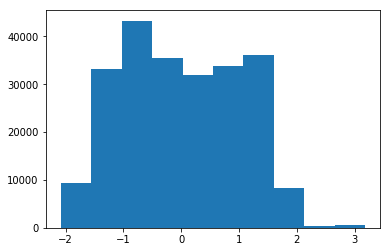

In [33]:
# 訓練データの標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train) # fit：渡されたデータの平均、標準偏差等の統計を取得して内部メモリに保存する
plt.hist(X_train_stand[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（学習用データ）

(array([ 4036., 14321., 18612., 15230., 13595., 14420., 15405.,  3519.,
          142.,   223.]),
 array([-2.08232663, -1.55615427, -1.02998191, -0.50380955,  0.02236281,
         0.54853517,  1.07470753,  1.60087989,  2.12705225,  2.65322461,
         3.17939697]),
 <a list of 10 Patch objects>)

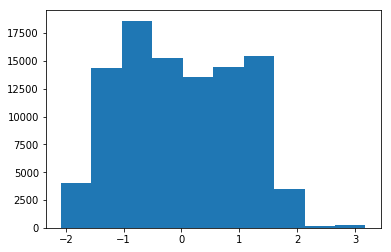

In [34]:
X_test_stand = stdsc.transform(X_test) # fitで取得した統計データを使って、渡されたデータを実際に書き換える
plt.hist(X_test_stand[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（テストデータ）

In [35]:
y_est = clf.predict(X_test)

y_est_proba = clf.predict_proba(X_test) # 確率値を得る

conf_mat = pd.DataFrame(confusion_matrix(y_test,y_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est_proba, normalize=False))) 

accuracy = accuracy_score(y_test,y_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,59228,0
正解 = 達成,40275,0


対数尤度 = -1390306.097
正答率 = 59.524%
適合率 = 59.524%
再現率 = 100.000%
F1値 = 74.627


C:\Users\t104950\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
df_c_sample = df_c_all.sample(n = 50000) # サンプルを得る
df_c_sample　# ランダムサンプリングされているか確認

,state,name_length,day_left,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
184395,True,38,13.952211,750.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
370546,False,23,29.073611,20000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
271254,False,46,29.448877,6082.81,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
357999,False,41,59.857720,500.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59842,False,22,29.077813,25000.00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
246632,True,42,29.328391,3250.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
181193,False,16,29.249792,15000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9283,True,26,13.331076,5000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
135462,True,43,14.947292,4000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157997,False,36,29.504745,6221.85,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
y1 = df_c_sample['state'].values
X1 = df_c_sample.drop('state',axis=1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1000)

std_scaler = StandardScaler() 

X1_scaled = std_scaler.fit_transform(X1_train)

# ロジスティック回帰
clf1 = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1000, tol=1e-3)
clf1.fit(X1_scaled, y1_train)

# SVM
clf3 = SGDClassifier(loss='hinge', penalty='none', max_iter=10000, fit_intercept=True, random_state=1000, tol=1e-3)
clf3.fit(X1_scaled, y1_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge',
       max_iter=10000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='none', power_t=0.5, random_state=1000, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
# サンプル数50000でのロジスティック回帰

y1_est = clf.predict(X1_test)

y1_est_proba = clf.predict_proba(X1_test)

conf_mat = pd.DataFrame(confusion_matrix(y1_test,y1_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

print('対数尤度 = {:.3f}'.format(- log_loss(y1_test, y1_est_proba, normalize=False))) 

accuracy = accuracy_score(y1_test,y1_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y1_test, y1_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,9024,0
正解 = 達成,5976,0


対数尤度 = -206253.692
正答率 = 60.160%
適合率 = 60.160%
再現率 = 100.000%
F1値 = 75.125


C:\Users\t104950\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* gridserchはn=1000で行っても時間がかかりすぎて終わらなかったので却下
* サンプル数50000でも大きく結果は変わらなかったため、SVMはn=50000で実行

In [40]:
# サンプル数50000の非線形SVM

from sklearn.svm import SVC # 分類
from common_func import plot_decision_regions # 決定領域表示関数
C = 5 
karnel='rbf'
gamma = 1 
clf2 = SVC(C=C, kernel=kernel, gamma=gamma)
clf2.fit(X1_train, y1_train)

y2_est = clf2.predict(X1_test)

conf_mat = pd.DataFrame(confusion_matrix(y1_test,y2_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

accuracy = accuracy_score(y1_test,y2_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y1_test, y2_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,8034,990
正解 = 達成,5117,859


正答率 = 59.287%
適合率 = 61.090%
再現率 = 89.029%
F1値 = 72.460


In [41]:
# サンプル数50000の線形SVM

y3_est = clf3.predict(X1_test)

conf_mat = pd.DataFrame(confusion_matrix(y1_test,y3_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat) 

accuracy = accuracy_score(y1_test,y3_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y1_test, y3_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,9024,0
正解 = 達成,5976,0


正答率 = 60.160%
適合率 = 60.160%
再現率 = 100.000%
F1値 = 75.125


C:\Users\t104950\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* X,y：全数による訓練データ、テストデータ　X1,y1：n=50000による訓練データ、テストデータ
* clf：全数ロジスティック回帰(未正則化)、clf1：n=50000ロジスティック回帰(未正則化)、clf2：n=50000非線形SVM、clf3：n=50000線形SVM(未正則化)
* 結果の混同行列を確認すると、今のところn=50000の非線形SVMが一番まともに見える…次は正則化を試してみる

In [43]:
# 全数でのロジスティック回帰のL2正則化

y = df_c_all['state'].values
X = df_c_all.drop('state',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X_train)

clf4 = SGDClassifier(loss='log', penalty='L2', max_iter=10000, fit_intercept=True, random_state=1000, tol=1e-5)
clf4.fit(X_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='L2',
       power_t=0.5, random_state=1000, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
# ラベルを予測
y4_est = clf4.predict(X_test)

# 確率値を得る
y4_est_proba = clf4.predict_proba(X_test)

conf_mat = pd.DataFrame(confusion_matrix(y_test,y4_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y4_est_proba, normalize=False))) 

accuracy = accuracy_score(y_test,y4_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y4_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,59226,2
正解 = 達成,40251,24


対数尤度 = -1388054.330
正答率 = 59.546%
適合率 = 59.537%
再現率 = 99.997%
F1値 = 74.637


In [45]:
# 全数でのロジスティック回帰のL1正則化

y = df_c_all['state'].values
X = df_c_all.drop('state',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X_train)

clf5 = SGDClassifier(loss='log', penalty='L1', max_iter=10000, fit_intercept=True, random_state=1000, tol=1e-5)
clf5.fit(X_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='L1',
       power_t=0.5, random_state=1000, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
# ラベルを予測
y5_est = clf5.predict(X_test)

# 確率値を得る
y5_est_proba = clf5.predict_proba(X_test)

conf_mat = pd.DataFrame(confusion_matrix(y_test,y5_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y5_est_proba, normalize=False))) 

accuracy = accuracy_score(y_test,y5_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y5_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,59228,0
正解 = 達成,40275,0


対数尤度 = -1389144.690
正答率 = 59.524%
適合率 = 59.524%
再現率 = 100.000%
F1値 = 74.627


C:\Users\t104950\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
# 全数でのロジスティック回帰のElasticnet(L1正則化の強さはデフォルトの0.15とする)

y = df_c_all['state'].values
X = df_c_all.drop('state',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X_train)

clf6 = SGDClassifier(loss='log', penalty='elasticnet', l1_ratio=0.15, max_iter=10000, fit_intercept=True, random_state=1000, tol=1e-5)
clf6.fit(X_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=1000, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
# ラベルを予測
y6_est = clf6.predict(X_test)

# 確率値を得る
y6_est_proba = clf6.predict_proba(X_test)

conf_mat = pd.DataFrame(confusion_matrix(y_test,y6_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y6_est_proba, normalize=False))) 

accuracy = accuracy_score(y_test,y6_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y6_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,59227,1
正解 = 達成,40258,17


対数尤度 = -1388219.097
正答率 = 59.540%
適合率 = 59.534%
再現率 = 99.998%
F1値 = 74.634


In [49]:
# 全数での線形SVM

y = df_c_all['state'].values
X = df_c_all.drop('state',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X_train)

clf7 = SGDClassifier(loss='hinge', penalty='none', max_iter=10000, fit_intercept=True, random_state=1000, tol=1e-5)
clf7.fit(X_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge',
       max_iter=10000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='none', power_t=0.5, random_state=1000, shuffle=True,
       tol=1e-05, validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
y7_est = clf7.predict(X_test)

conf_mat = pd.DataFrame(confusion_matrix(y_test,y7_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

accuracy = accuracy_score(y_test,y7_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y7_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,59228,0
正解 = 達成,40275,0


正答率 = 59.524%
適合率 = 59.524%
再現率 = 100.000%
F1値 = 74.627


C:\Users\t104950\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* 様々試したが、混同行列を見て予測=達成が0というのも疑問…直感的に見て非線形SVMかロジスティック回帰(L2正則化適用)がまだまともに見える
* そもそも説明変数が適切ではないのでは…？  ⇒ ワンホットベクトルを標準化にしてるのがおかしい、という仮説をたててみる

In [98]:
#標準化
df_c_drop = df_c.drop('state',axis=1)
df_c_s = (df_c_drop - df_c_drop.mean()) / df_c_drop.std(ddof=0)
display(df_c_s.head())

,name_length,day_left,usd_goal_real
0,-0.201736,1.972903,-0.036049
1,0.675364,2.075979,-0.010379
2,-1.266787,0.911406,0.003147
3,0.925964,-0.277534,-0.032924
5,-0.890887,0.081917,0.007656


In [99]:
df_c_s = pd.concat([df_c['state'],df_c_s],axis=1)
display(df_c_s.head())

,state,name_length,day_left,usd_goal_real
0,False,-0.201736,1.972903,-0.036049
1,False,0.675364,2.075979,-0.010379
2,False,-1.266787,0.911406,0.003147
3,False,0.925964,-0.277534,-0.032924
5,True,-0.890887,0.081917,0.007656


In [100]:
# ２つのデータフレームを結合させる
df_c_as = pd.concat([df_c_s,df_fs_dummy],axis=1) 
df_c_alls = pd.concat([df_c_as,df_fs_dummy_c],axis=1)
df_c_alls.head()

,state,name_length,day_left,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,False,-0.201736,1.972903,-0.036049,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,False,0.675364,2.075979,-0.010379,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,False,-1.266787,0.911406,0.003147,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,False,0.925964,-0.277534,-0.032924,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,True,-0.890887,0.081917,0.007656,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
# 全数ロジスティック回帰L2正則化
y10 = df_c_alls['state'].values
X10 = df_c_alls.drop('state',axis=1).values
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=1000)

clf10 = SGDClassifier(loss='log', penalty='L2', max_iter=10000, fit_intercept=True, random_state=1000, tol=1e-5)
clf10.fit(X10_train, y10_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='L2',
       power_t=0.5, random_state=1000, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
y10_est = clf10.predict(X10_test)

y10_est_proba = clf10.predict_proba(X10_test)

conf_mat = pd.DataFrame(confusion_matrix(y10_test,y10_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

print('対数尤度 = {:.3f}'.format(- log_loss(y10_test, y10_est_proba, normalize=False))) 

accuracy = accuracy_score(y10_test,y10_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y10_test, y10_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,48793,10435
正解 = 達成,24959,15316


対数尤度 = -62115.786
正答率 = 64.429%
適合率 = 66.158%
再現率 = 82.382%
F1値 = 73.384


* 混同行列に信憑性が出てきた気がするので、このデータフレームでサンプルを取得し非線形SVMを実行してみる

In [106]:
df_c_s_sample = df_c_alls.sample(n = 50000) # サンプルを得る

In [109]:
y11 = df_c_s_sample['state'].values
X11 = df_c_s_sample.drop('state',axis=1).values
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.3, random_state=1000)

C = 5 
karnel='rbf'
gamma = 'scale' 
clf11 = SVC(C=C, kernel=kernel, gamma=gamma)
clf11.fit(X11_train, y11_train)

y11_est = clf11.predict(X11_test)

conf_mat = pd.DataFrame(confusion_matrix(y11_test,y11_est),
                       index=['正解 = 未達成','正解 = 達成'],
                       columns=['予測 = 未達成','予測 = 達成'])
display(conf_mat)

accuracy = accuracy_score(y11_test,y11_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y11_test, y11_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 未達成,予測 = 達成
正解 = 未達成,7293,1603
正解 = 達成,3768,2336


正答率 = 64.193%
適合率 = 65.934%
再現率 = 81.981%
F1値 = 73.087
